<a href="https://colab.research.google.com/github/karthikhub19/MachineLearningAlogs/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [4]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [5]:
df.astype(float)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2.0,13.0,44.0,1.0,9.0,64.0,4.0,5.0,0.0,0.0,2.0,1.0
1,3.0,11.0,33.0,1.0,7.0,136.0,5.0,5.0,0.0,0.0,6.0,4.0
2,3.0,68.0,52.0,1.0,24.0,116.0,1.0,29.0,0.0,1.0,2.0,3.0
3,2.0,33.0,33.0,0.0,12.0,33.0,2.0,0.0,0.0,1.0,1.0,1.0
4,2.0,23.0,30.0,1.0,9.0,30.0,1.0,2.0,0.0,0.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.0,10.0,39.0,0.0,0.0,27.0,3.0,0.0,0.0,1.0,3.0,1.0
996,1.0,7.0,34.0,0.0,2.0,22.0,5.0,5.0,0.0,1.0,1.0,1.0
997,3.0,67.0,59.0,0.0,40.0,944.0,5.0,33.0,0.0,1.0,1.0,4.0
998,3.0,70.0,49.0,0.0,18.0,87.0,2.0,22.0,0.0,1.0,1.0,3.0


In [6]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [7]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [9]:
from sklearn.neighbors import KNeighborsClassifier

k = 4
#Train Model and Predict 
model = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
model


KNeighborsClassifier(n_neighbors=4)

In [10]:
yhat = model.predict(X_test)
yhat


array([3, 1, 3, 4, 4, 3, 3, 1, 2, 2, 4, 1, 3, 4, 3, 1, 2, 2, 3, 2, 3, 3,
       4, 2, 1, 3, 1, 4, 1, 4, 2, 4, 4, 2, 1, 2, 3, 4, 1, 1, 1, 4, 3, 2,
       3, 1, 4, 1, 2, 4, 3, 1, 2, 1, 3, 1, 3, 1, 1, 1, 1, 2, 4, 2, 4, 3,
       1, 2, 2, 2, 1, 3, 3, 3, 1, 2, 3, 3, 1, 3, 4, 3, 1, 1, 1, 1, 3, 4,
       1, 3, 3, 1, 1, 3, 1, 3, 1, 2, 1, 4, 3, 1, 3, 1, 3, 2, 3, 2, 2, 3,
       1, 1, 2, 4, 3, 1, 1, 2, 2, 1, 1, 1, 2, 4, 1, 1, 4, 4, 1, 1, 1, 3,
       1, 2, 1, 3, 2, 1, 2, 1, 2, 3, 3, 2, 1, 1, 1, 4, 1, 2, 1, 3, 2, 3,
       3, 4, 3, 1, 1, 1, 1, 3, 1, 1, 3, 2, 1, 1, 4, 1, 2, 3, 3, 3, 4, 3,
       4, 1, 4, 4, 3, 2, 1, 1, 3, 3, 1, 3, 3, 1, 3, 1, 2, 2, 3, 3, 1, 2,
       2, 3])

In [11]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy for k=6: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy for k=6: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.55875
Test set Accuracy:  0.26
Train set Accuracy for k=6:  0.4975
Test set Accuracy for k=6:  0.29


In [12]:
K = 10
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))
ConfustionMx = [];
for n in range(1,K):
  
   #Train Model and Predict 
   neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
   yhat=neigh.predict(X_test)
   mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
 
  
   std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
 
mean_acc


array([0.275, 0.31 , 0.275, 0.26 , 0.3  , 0.29 , 0.345, 0.325, 0.32 ])

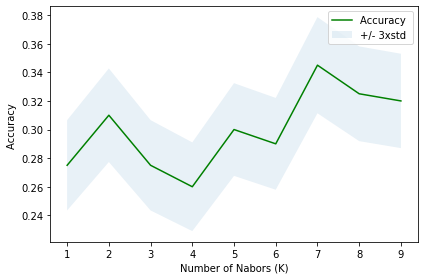

In [13]:
plt.plot(range(1,K),mean_acc,'g')
plt.fill_between(range(1,K),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [14]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.345 with k= 7


Breast Cancer


In [15]:
data_dir = "https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/breast-cancer.csv"
df_breast = pd.read_csv(data_dir)
df_breast.head()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


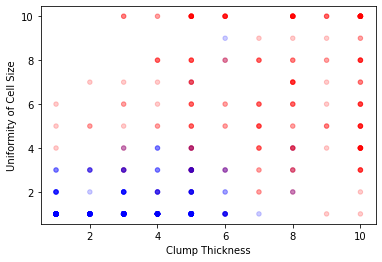

In [16]:
colors = df_breast["Class"].map({
   0: "blue",
   1: "red"
})
 
df_breast.plot.scatter(
   x="Clump Thickness", y="Uniformity of Cell Size", c=colors,
   alpha=.2
)


In [21]:
X = df_breast[['Clump Thickness','Uniformity of Cell Size']] .values
X[0:5]

array([[5, 1],
       [5, 4],
       [3, 1],
       [6, 8],
       [4, 1]])

In [22]:
y = df_breast['Class'].values
y[0:5]

array([0, 0, 0, 0, 0])

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 2) (546,)
Test set: (137, 2) (137,)


In [33]:
from sklearn.neighbors import KNeighborsClassifier

k = 4
#Train Model and Predict 
model = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
model

KNeighborsClassifier(n_neighbors=4)

In [34]:
yhat = model.predict(X_test)
yhat

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1])

In [35]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy for k=6: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy for k=6: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.9502196193265008
Test set Accuracy:  0.9635036496350365
Train set Accuracy for k=6:  0.9546120058565154
Test set Accuracy for k=6:  0.9562043795620438


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [36]:
K = 10
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))
ConfustionMx = [];
for n in range(1,K):
  
   #Train Model and Predict 
   neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
   yhat=neigh.predict(X_test)
   mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
 
  
   std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
 
mean_acc

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature n

array([0.93430657, 0.95620438, 0.95620438, 0.96350365, 0.94890511,
       0.95620438, 0.95620438, 0.95620438, 0.95620438])

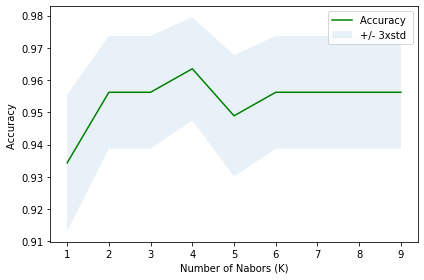

In [37]:
plt.plot(range(1,K),mean_acc,'g')
plt.fill_between(range(1,K),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

Standard Scaler

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
 
# define a pipeline
pipeline = make_pipeline(
   StandardScaler(),
   KNeighborsClassifier(n_neighbors=4)
)
 
# fit the pipeline (using X_train and y_train defined above)
pipeline.fit(X_train, y_train)
 
# define the test data (recall that scikit-learn expects a 2D-array)
print(pipeline.predict([[6, 7]]))

[1]


In [30]:
X_train = df_breast[["Clump Thickness", "Uniformity of Cell Size"]]
y_train = df_breast["Class"]

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


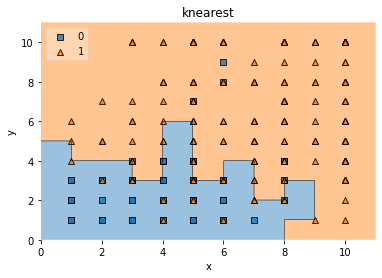

In [31]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import numpy as np



plot_decision_regions(X_train.values, y_train.values, clf=pipeline, legend=2)

plt.xlabel('x')
plt.ylabel('y')
plt.title('knearest')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


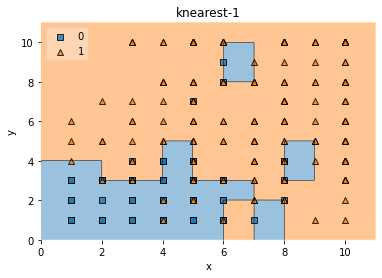

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


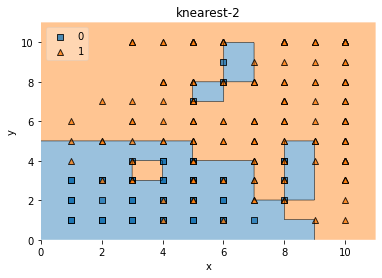

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


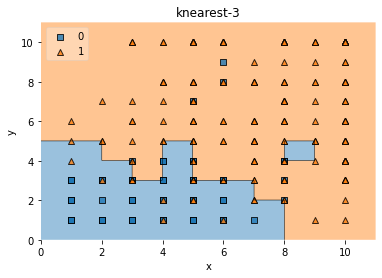

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


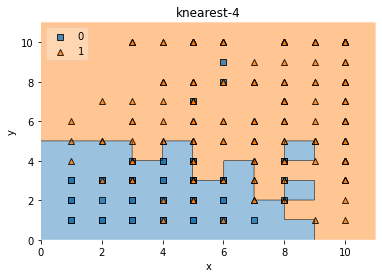

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


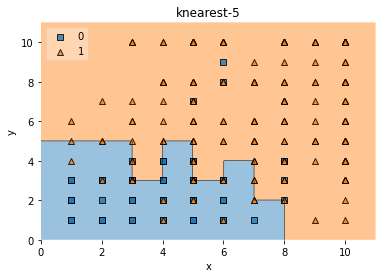

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


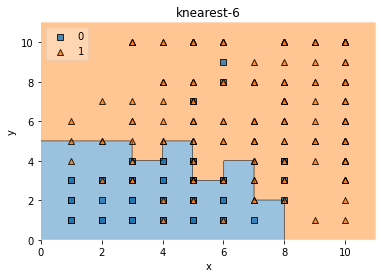

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


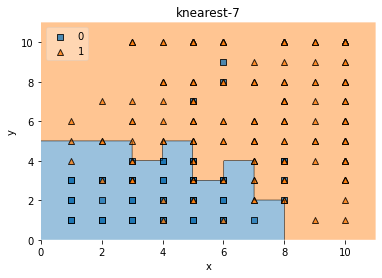

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


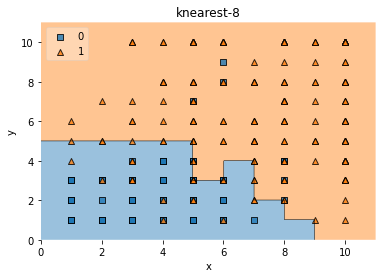

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


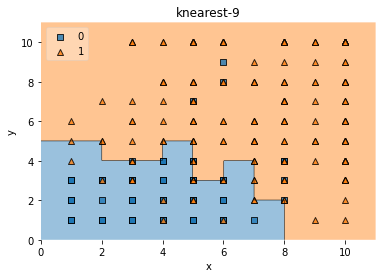

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


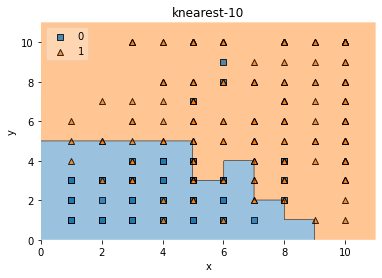

In [32]:
K = 11
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))
for i in range(1,K):
 model = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
 
 neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
 yhat=neigh.predict(X_test)
 mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)
 
 plt.xlabel('x')
 plt.ylabel('y')
 plot_decision_regions(X_train.values, y_train.values, clf=model, legend=2)
 plt.title('knearest' + '-' + str(i))
 plt.show()
 mean_acc


FPR
TPR
FNR
TNR
confused matrix
tpr=tp/tp+fn